In [1]:
import sys
sys.path.append("..")

import dotenv

from helpers.load_data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dotenv.load_dotenv()
DATA_DIRECTORY = os.environ.get("DATA_DIRECTORY", './data')


In [2]:
dfs = load_datafolder("raw")

calls_df = dfs['calls.csv']
reasons_df = dfs['reasons.csv']

/home/morris/Documents/coding/vanML-2023/notebooks/../helpers/load_data.py:20: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_filepath)


In [3]:
cleaned_calls_df = calls_df.dropna(subset=['CallLength']).drop(columns=["Unnamed: 0"], axis=1)
cleaned_reasons_df = reasons_df.drop(columns=["Unnamed: 0"], axis=1).rename({"callreportnum1": "callreportnum"}, axis=1)

In [4]:
joined_df = cleaned_calls_df.merge(cleaned_reasons_df, on='callreportnum', how='inner')
joined_df

,callreportnum,DateStart,TimeStart,DateEnd,TimeEnd,CallLength,CityName,CallType,ContactMethod,CallerDemographicsGender,CallerDemographicsAgeGroup,CallerDemographicsCallerType,CallerTypeAffected3rdParty,CallerDemographicsInterpretationLanguage,CallerDemographicsInterpretationOtherlanguage,PublicityOtherPublicity,Mainreason,ReasonDetail
0,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Not Obtained,Abuse,Domestic Violence
1,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Not Obtained,Housing and Homelessness,Immediate Shelter
2,54694245.0,2018-07-16,1899-12-31 16:39:00,2018-07-16,1899-12-31 17:07:00,28,unknown,Assessment and Referral,Text Message,Unknown,19-54 Adult,Individual,NaN,NaN,NaN,Service Provider,BC Hydro CCF,NaN
3,54693989.0,2018-07-16,1899-12-31 16:27:00,2018-07-16,1899-12-31 16:37:00,10,Winnipeg,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Service Provider,Housing and Homelessness,Immediate Shelter
4,54693908.0,2018-07-16,1899-12-31 16:23:00,2018-07-16,1899-12-31 16:26:00,3,Burnaby,Assessment and Referral,Telephone,Female,19-54 Adult,Service Provider,NaN,NaN,NaN,Not Obtained,Income & Financial Assistance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314849,110115194.0,2022-12-07,1899-12-31 15:30:00,2022-12-07,1899-12-31 15:38:00,8,Duncan,Assessment and Referral,Telephone,Female,65+ Senior,Individual,NaN,NaN,NaN,Not Obtained,Advocacy,NaN
314850,110115194.0,2022-12-07,1899-12-31 15:30:00,2022-12-07,1899-12-31 15:38:00,8,Duncan,Assessment and Referral,Telephone,Female,65+ Senior,Individual,NaN,NaN,NaN,Not Obtained,Income & Financial Assistance,Other
314851,110115107.0,2022-12-07,1899-12-31 15:28:00,2022-12-07,1899-12-31 15:35:00,7,Vancouver,Assessment and Referral,Telephone,Male,65+ Senior,Individual,NaN,NaN,NaN,Not Obtained,Housing and Homelessness,Immediate Shelter
314852,110114724.0,2022-12-07,1899-12-31 15:19:00,2022-12-07,1899-12-31 15:21:00,2,Vancouver,Assessment and Referral,Telephone,Male,65+ Senior,Service Provider,NaN,NaN,NaN,Service Provider,Housing and Homelessness,Immediate Shelter


In [5]:
joined_df = joined_df[(joined_df['CityName'] != 'unknown') & (joined_df['CallerDemographicsInterpretationLanguage'] != 'Other') & (joined_df['CallerDemographicsInterpretationLanguage'] != 'Other specify below')]
joined_df['CallerDemographicsInterpretationLanguage'] = joined_df['CallerDemographicsInterpretationLanguage'].copy().fillna('English')
#
gender_map = {"2 Sprited": "2 Spirit", "Trans Female": "Transgender", "Trans Male": "Transgender"}
joined_df['CallerDemographicsGender'] = joined_df['CallerDemographicsGender'].copy().replace(gender_map)

/tmp/ipykernel_5551/921071275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df['CallerDemographicsInterpretationLanguage'] = joined_df['CallerDemographicsInterpretationLanguage'].copy().fillna('English')
/tmp/ipykernel_5551/921071275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df['CallerDemographicsGender'] = joined_df['CallerDemographicsGender'].copy().replace(gender_map)


In [20]:
oldDT_cols = ["DateStart", "TimeStart"]
joined_df = load_datetimes(joined_df, oldDT_cols)

joined_df["DayOfWeek"] = joined_df["DateStart"].dt.day_name()
joined_df["Hour"] = joined_df["TimeStart"].dt.hour

joined_df["Month"] = joined_df["DateStart"].dt.month
joined_df["Year"] = joined_df["DateStart"].dt.year

joined_df


/home/morris/Documents/coding/vanML-2023/notebooks/../helpers/load_data.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dt_cols] = df[dt_cols].apply(pd.to_datetime)
/tmp/ipykernel_5551/916270579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df["DayOfWeek"] = joined_df["DateStart"].dt.day_name()
/tmp/ipykernel_5551/916270579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,callreportnum,DateStart,TimeStart,DateEnd,TimeEnd,CallLength,CityName,CallType,ContactMethod,CallerDemographicsGender,...,CallerTypeAffected3rdParty,CallerDemographicsInterpretationLanguage,CallerDemographicsInterpretationOtherlanguage,PublicityOtherPublicity,Mainreason,ReasonDetail,DayOfWeek,Hour,Month,Year
0,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,...,NaN,English,NaN,Not Obtained,Abuse,Domestic Violence,Monday,16,7,2018
1,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,...,NaN,English,NaN,Not Obtained,Housing and Homelessness,Immediate Shelter,Monday,16,7,2018
3,54693989.0,2018-07-16,1899-12-31 16:27:00,2018-07-16,1899-12-31 16:37:00,10,Winnipeg,Assessment and Referral,Telephone,Female,...,NaN,English,NaN,Service Provider,Housing and Homelessness,Immediate Shelter,Monday,16,7,2018
4,54693908.0,2018-07-16,1899-12-31 16:23:00,2018-07-16,1899-12-31 16:26:00,3,Burnaby,Assessment and Referral,Telephone,Female,...,NaN,English,NaN,Not Obtained,Income & Financial Assistance,NaN,Monday,16,7,2018
5,54693150.0,2018-07-16,1899-12-31 15:54:00,2018-07-16,1899-12-31 15:56:00,2,Vancouver,Assessment and Referral,Telephone,Male,...,NaN,English,NaN,Repeat Caller,Legal and Public Safety,Legal Advice,Monday,15,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314849,110115194.0,2022-12-07,1899-12-31 15:30:00,2022-12-07,1899-12-31 15:38:00,8,Duncan,Assessment and Referral,Telephone,Female,...,NaN,English,NaN,Not Obtained,Advocacy,NaN,Wednesday,15,12,2022
314850,110115194.0,2022-12-07,1899-12-31 15:30:00,2022-12-07,1899-12-31 15:38:00,8,Duncan,Assessment and Referral,Telephone,Female,...,NaN,English,NaN,Not Obtained,Income & Financial Assistance,Other,Wednesday,15,12,2022
314851,110115107.0,2022-12-07,1899-12-31 15:28:00,2022-12-07,1899-12-31 15:35:00,7,Vancouver,Assessment and Referral,Telephone,Male,...,NaN,English,NaN,Not Obtained,Housing and Homelessness,Immediate Shelter,Wednesday,15,12,2022
314852,110114724.0,2022-12-07,1899-12-31 15:19:00,2022-12-07,1899-12-31 15:21:00,2,Vancouver,Assessment and Referral,Telephone,Male,...,NaN,English,NaN,Service Provider,Housing and Homelessness,Immediate Shelter,Wednesday,15,12,2022


In [21]:
joined_df.to_csv(f'{DATA_DIRECTORY}/processed/final_data.csv', index=False)

Text(0.5, 1.0, 'Median Call Length (minutes)')

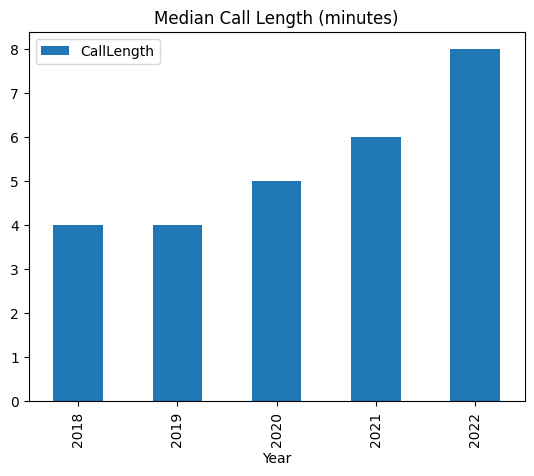

In [41]:
plot_df = joined_df.groupby("Year").agg({"CallLength": "median"}).reset_index().plot.bar(x="Year")
plt.title("Median Call Length (minutes)")